<a href="https://colab.research.google.com/github/yantvrs/Data_structure_2/blob/main/U2T3/Requisito_1/requisito_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia

In [ ]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [ ]:
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier",
         "Pubmed Central",
         "Digital Object Identifier",
         "Arxiv",
         "Proc Natl Acad Sci Usa",
         "Bibcode",
         "Library Of Congress Control Number",
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)")

# Rede 1

## 1.1 Get the Data, Build the Nerwork

In [ ]:
#https://en.wikipedia.org/wiki/Federative_units_of_Brazil#List
SEED1 = "Federative units of Brazil".title()

In [ ]:
todo_lst = [(0, SEED1)] # The SEED is in the layer 0
todo_set = set(SEED1) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g1 = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g1.add_edge(page, link)
  layer, page = todo_lst[0]

0 Federative Units Of Brazil
1 1834 Additional Act
1 1937 Brazilian Coup D'État
1 1945 Brazilian Coup D'État
1 1964 Brazilian Coup D'État
1 1964 Vacancy In The Presidency Of Brazil
1 1993 Brazilian Constitutional Referendum
1 2005 Brazilian Firearms And Ammunition Referendum
1 2010 Acre Time Zone Referendum
1 2011 Pará State Division Plebiscite
1 2012 Brazilian Municipal Elections
1 2014 Brazilian General Election
1 2016 Brazilian Municipal Elections
1 2018 Brazilian General Election
1 2020 Brazilian Municipal Elections
1 2022 Brazilian General Election
1 2Nd Portuguese India Armada (Cabral, 1500)
1 57Th Legislature Of The National Congress
1 Ai-5
1 Abdication Of Pedro I Of Brazil
1 Abortion In Brazil
1 Acre (State)
1 Acre War
1 Administrative Division
1 Administrative Divisions Of Brazil
1 Administrative Regions Of The Federal District (Brazil)
Could not load Administrative Regions Of The Federal District (Brazil)
1 Afro-Brazilian History
1 Agriculture In Brazil
1 Alagoas
1 Amapá
1 Am

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load G20
1 Geography Of Brazil
1 Geology Of Brazil
1 Geraldo Alckmin
1 Getúlio Vargas
1 Goiás
1 Goiânia
1 Governance Of Brazil
1 Government
1 Government Of Brazil
1 Governor-General
1 Governor (Brazil)
1 Governorate Of New Andalusia
1 Governorate Of New Castile
1 Governorate Of New Toledo
1 Grande Seca
1 Guanabara (State)
1 Guaraní War
1 Gun Control In Brazil
1 Health In Brazil
1 Hinduism In Brazil
Could not load Hinduism In Brazil
1 History Of Acre
1 History Of Alagoas
1 History Of Amapá
1 History Of Amazonas
1 History Of Bahia
1 History Of Brasília
1 History Of Brazil
1 History Of Brazil (1985–Present)
1 History Of Brazil Since 1985
1 History Of Brazilian Animation
1 History Of Brazilian Nationality
1 History Of Ceará
1 History Of Espírito Santo
1 History Of Goiás
1 History Of Maranhão
1 History Of Mato Grosso
1 History Of Mato Grosso Do Sul
1 History Of Minas Gerais
1 History Of Paraná
1 History Of Paraíba
1 History Of Pará
1 History Of Pernambuco
1 History Of Piauí
1 Hist

In [ ]:
print("{} nodes, {} edges".format(len(g1), nx.number_of_edges(g1)))

58638 nodes, 164652 edges


## 1.2 Eliminate Duplicates

In [ ]:
original1 = g1.copy()

In [ ]:
# remove self loops
g1.remove_edges_from(nx.selfloop_edges(g1))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g1 if node + "s" in g1
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g1 = nx.contracted_nodes(g1, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g1]
                if x != y and y in g1]
print(duplicates)

for dup in duplicates:
  gsw1 = nx.contracted_nodes(g1, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g1, 0,"contraction")
nx.set_edge_attributes(g1, 0,"contraction")

[('Non-Governmental Organization', 'Non-Governmental Organizations'), ('Video Game', 'Video Games'), ('Anti-Abortion Movement', 'Anti-Abortion Movements'), ('Afro-Brazilian', 'Afro-Brazilians'), ('Asian Brazilian', 'Asian Brazilians'), ('Inca', 'Incas'), ('Ordinal Direction', 'Ordinal Directions'), ('Plantation', 'Plantations'), ('Rainforest', 'Rainforests'), ('Rubber Tree', 'Rubber Trees'), ('Temperature', 'Temperatures'), ('White Brazilian', 'White Brazilians'), ('Borough', 'Boroughs'), ('City-State', 'City-States'), ('Election', 'Elections'), ('Electoral District', 'Electoral Districts'), ('Federation', 'Federations'), ('Hybrid Regime', 'Hybrid Regimes'), ('Legislature', 'Legislatures'), ('Political System', 'Political Systems'), ('Province', 'Provinces'), ('Arab', 'Arabs'), ('Bantu People', 'Bantu Peoples'), ('Capoeira', 'Capoeiras'), ('Favela', 'Favelas'), ('Monjolo', 'Monjolos'), ('Muslim', 'Muslims'), ('Portuguese Brazilian', 'Portuguese Brazilians'), ('Quilombo', 'Quilombos'), 

In [ ]:
print("{} nodes, {} edges".format(len(g1), nx.number_of_edges(g1)))

58306 nodes, 164381 edges


##1.3 Truncate the network





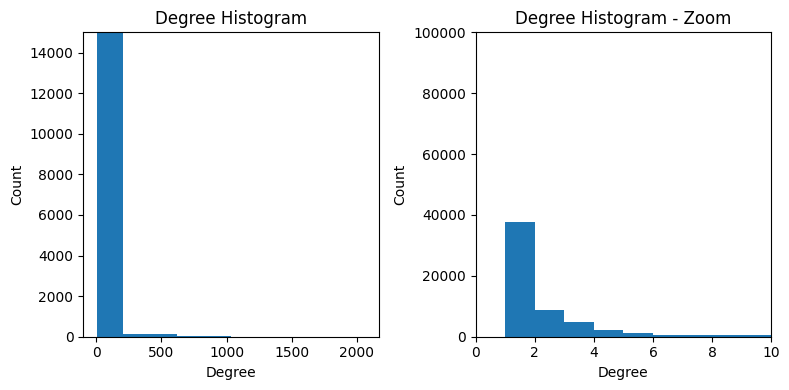

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,100000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g1.degree()).items() if deg >= 3]

# select a subgraph with 'core' nodes
gsub1 = nx.subgraph(g1, core)

print("{} nodes, {} edges".format(len(gsub1), nx.number_of_edges(gsub1)))

nx.write_graphml(gsub1, "cn1.graphml")

11862 nodes, 109071 edges


# Rede 2


## 2.1 Get the Data, Build the Network

In [ ]:
#https://en.wikipedia.org/wiki/Demographics_of_Brazil
SEED2 = "Demographics of Brazil".title()

In [ ]:
todo_lst = [(0, SEED2)] # The SEED is in the layer 0
todo_set = set(SEED2) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g2 = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS is not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g2.add_edge(page, link)
  layer, page = todo_lst[0]

0 Demographics Of Brazil
1 1980S
1 2010 Brazilian Census
1 2022 Brazilian Census
Could not load 2022 Brazilian Census
1 Abortion In Brazil
1 Acre (State)
1 Administrative Divisions Of Brazil
1 Adventism
1 Adventist Church Of Promise
1 African People
1 Afro-Brazilian
1 Afro-Brazilians
1 Agriculture In Brazil
1 Akan People
1 Alto Trás-Os-Montes
1 Amapá
1 Amazon Basin
1 Amazon Rainforest
1 Amazonas (Brazilian State)
1 Amazonian Jews
1 Amazônia Legal
1 American Brazilians
1 Americana, São Paulo
1 Americas
1 Amerindian
1 Ancestry
1 Andalusia
1 Angola
1 Angolan Immigration To Brazil
1 Animal Husbandry In Brazil
1 Antiochian Orthodox Archdiocese Of São Paulo And All Brazil
1 Anusim
1 Arab
1 Arab Brazilians
1 Arawaks
1 Archaeology In Brazil
1 Argentina
1 Argentine Brazilians
1 Argentines Of European Descent
1 Armenian Brazilians
1 Armenian Catholic Apostolic Exarchate Of Latin America And Mexico
1 Ashkenazi Jews
1 Asian Brazilian
1 Asian Brazilians
1 Asian People
1 Assemblies Of God
1 Atheism


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Cia
1 Cia World Factbook
1 Covid-19 Pandemic
1 Caboclo
1 Caiçaras
1 Calabria
1 Cambridge University Press
1 Campania
Could not load Campania
1 Campinas
1 Canada
Could not load Canada
1 Canadian Brazilians
1 Candomblé
1 Cape Verde
1 Carambeí
1 Caribbean Brazilians
1 Castizo
1 Castrolanda
1 Catholic Church In Brazil
1 Caxias Do Sul
1 Ceará
1 Censorship In Brazil
1 Central-West Region, Brazil
1 Central Bank Of Brazil
1 Centro-Sul
1 Chile
1 Chilean Brazilians
1 China
Could not load China
1 Chinese Brazilians
1 Chinese Language
1 Christian Congregation Of Brazil
1 Christianity
Could not load Christianity
1 Cinema Of Brazil
1 Climate Change In Brazil
1 Climate Of Brazil
1 Coastline Of Brazil
1 Colombia
Could not load Colombia
1 Colonial Brazil
1 Community Of Portuguese Language Countries
1 Concubines
1 Confederados
1 Congolese Immigration To Brazil
1 Constitution Of Brazil
1 Corruption In Brazil
1 Cotton Plantation
1 Count Francesco Matarazzo
1 Criciúma
1 Crime In Brazil
1 Cro

In [ ]:
print("{} nodes, {} edges".format(len(g2), nx.number_of_edges(g2)))

126696 nodes, 318121 edges


## 2.2 Eliminate Duplicates

In [ ]:
original2 = g2.copy()

In [ ]:
# remove self loops
g2.remove_edges_from(nx.selfloop_edges(g2))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g2 if node + "s" in g2
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g2 = nx.contracted_nodes(g2, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g2]
                if x != y and y in g2]
print(duplicates)

for dup in duplicates:
  gsw2 = nx.contracted_nodes(g2, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g2, 0,"contraction")
nx.set_edge_attributes(g2, 0,"contraction")

[('Manchu', 'Manchus'), ('Merchant', 'Merchants'), ('Afro-Haitian', 'Afro-Haitians'), ('Haitian Canadian', 'Haitian Canadians'), ('Physician', 'Physicians'), ('Ainu Language', 'Ainu Languages'), ('Earthquake', 'Earthquakes'), ('Humanitarian', 'Humanitarians'), ('Cuman', 'Cumans'), ('Cosmonaut', 'Cosmonauts'), ('Civil Right', 'Civil Rights'), ('Early Human Migration', 'Early Human Migrations'), ('National Interest', 'National Interests'), ('Settler', 'Settlers'), ('Abrahamic Religion', 'Abrahamic Religions'), ('Ahmadi', 'Ahmadis'), ('Alawite', 'Alawites'), ('Alevi', 'Alevis'), ('Angel', 'Angels'), ('Cultural Muslim', 'Cultural Muslims'), ('Dhimmi', 'Dhimmis'), ('Fatimid', 'Fatimids'), ('Hashemite', 'Hashemites'), ('Mozarab', 'Mozarabs'), ('Yazidi', 'Yazidis'), ('British Tamil', 'British Tamils'), ('Lascar', 'Lascars'), ('Luso-Indian', 'Luso-Indians'), ('Metropolitan Statistical Area', 'Metropolitan Statistical Areas'), ('Sioux War', 'Sioux Wars'), ('Yavapai War', 'Yavapai Wars'), ('Apia

In [ ]:
print("{} nodes, {} edges".format(len(g2), nx.number_of_edges(g2)))

125707 nodes, 313227 edges


## 2.3 Truncate the network

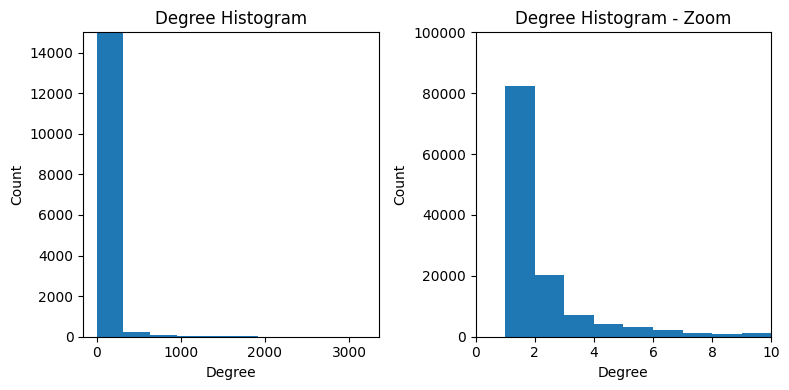

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,100000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g2.degree()).items() if deg >= 4]

# select a subgraph with 'core' nodes
gsub2 = nx.subgraph(g2, core)

print("{} nodes, {} edges".format(len(gsub2), nx.number_of_edges(gsub2)))

nx.write_graphml(gsub2, "cn2.graphml")

15909 nodes, 169010 edges


# Rede 3

## 3.1 Get the Data, Build the Network

In [ ]:
#https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities
SEED3 = "List of Olympic Games host cities".title()

In [ ]:
todo_lst = [(0, SEED3)] # The SEED is in the layer 0
todo_set = set(SEED3) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g3 = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS is not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g3.add_edge(page, link)
  layer, page = todo_lst[0]

0 List Of Olympic Games Host Cities
1 1896 Summer Olympics
Could not load 1896 Summer Olympics
1 1900 Summer Olympics
Could not load 1900 Summer Olympics
1 1904 Summer Olympics
Could not load 1904 Summer Olympics
1 1906 Intercalated Games
1 1908 Summer Olympics
1 1912 Summer Olympics
1 1916 Summer Olympics
1 1920 Summer Olympics
Could not load 1920 Summer Olympics
1 1924 Summer Olympics
1 1924 Winter Olympics
1 1928 Summer Olympics
1 1928 Winter Olympics
1 1932 Summer Olympics
1 1932 Winter Olympics
1 1936 Summer Olympics
Could not load 1936 Summer Olympics
1 1936 Winter Olympics
1 1940 Summer Olympics
1 1940 Winter Olympics
1 1944 Summer Olympics
Could not load 1944 Summer Olympics
1 1944 Winter Olympics
Could not load 1944 Winter Olympics
1 1948 Summer Olympics
Could not load 1948 Summer Olympics
1 1948 Winter Olympics
1 1952 Summer Olympics
1 1952 Winter Olympics
1 1956 Summer Olympics
1 1956 Winter Olympics
Could not load 1956 Winter Olympics
1 1960 Summer Olympics
1 1960 Winter Ol

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Olympiad
1 Olympic Charter
1 Olympic Esports Series
1 Olympic Games
1 Olympic Games Ceremony
1 Olympic Valley, California
1 Olympic And Paralympic Deaths
1 Olympic Diploma
1 Olympic Medal
1 Olympic Sports
1 Olympic Symbols
1 Olympic Video Games
1 Olympics On Television
1 Olympism
1 Oslo
Could not load Oslo
1 Ostend
1 Overseas Collectivity
1 Pacific Games
1 Pacific Ocean
1 Pan American Games
1 Paralympic Games
1 Paris
1 Participation Of Women In The Olympics
1 Pierre De Coubertin Medal
1 Pyeongchang County
1 Rio De Janeiro
1 Rome
1 Russia
1 Russian Olympic Committee
1 Sailing At The 1920 Summer Olympics
1 Salt Lake City
1 Sapporo
1 Sarajevo
1 Second Sino-Japanese War
1 Seoul
1 Sochi
1 Socialist Federal Republic Of Yugoslavia
1 South Korea
1 Southeast Asia
Could not load Southeast Asia
1 Soviet Olympic Committee
1 Soviet Union
1 Spain
Could not load Spain
1 Special Administrative Regions Of China
1 Squaw Valley, Placer County, California
1 St. Louis
Could not load St. Loui

In [ ]:
print("{} nodes, {} edges".format(len(g3), nx.number_of_edges(g3)))

84007 nodes, 160195 edges


## 3.2 Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original3 = g3.copy()

In [ ]:
# remove self loops
g3.remove_edges_from(nx.selfloop_edges(g3))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g3 if node + "s" in g3
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g3 = nx.contracted_nodes(g3, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g3]
                if x != y and y in g3]
print(duplicates)

for dup in duplicates:
  g3 = nx.contracted_nodes(g3, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g3, 0,"contraction")
nx.set_edge_attributes(g3, 0,"contraction")

[('National Olympic Committee', 'National Olympic Committees'), ('Olympiad', 'Olympiads'), ('Gold Medal', 'Gold Medals'), ('Demonstration Sport', 'Demonstration Sports'), ('Athlete', 'Athletes'), ('Cherry Blossom', 'Cherry Blossoms'), ('Figure Skater', 'Figure Skaters'), ('Olympic Record', 'Olympic Records'), ('World Record', 'World Records'), ('Chinese Character', 'Chinese Characters'), ('Department Store', 'Department Stores'), ('Indigenous People', 'Indigenous Peoples'), ('Roller Sport', 'Roller Sports'), ('Cosmonaut', 'Cosmonauts'), ('Cossack', 'Cossacks'), ('Firework', 'Fireworks'), ('Moscow Time', 'Moscow Times'), ('Ice Rink', 'Ice Rinks'), ('Guyana', 'Guyanas'), ('Agnostic', 'Agnostics'), ('Armadillo', 'Armadillos'), ('Aztec', 'Aztecs'), ('Catholic', 'Catholics'), ('Cloud Forest', 'Cloud Forests'), ('Continent', 'Continents'), ('Ethnic Group', 'Ethnic Groups'), ('Nahuatl Language', 'Nahuatl Languages'), ('Ocean', 'Oceans'), ('Paleo-Indian', 'Paleo-Indians'), ('Pentecostal', 'Pen

In [ ]:
print("{} nodes, {} edges".format(len(g3), nx.number_of_edges(g3)))

83674 nodes, 159970 edges


## 3.3 Truncate the network

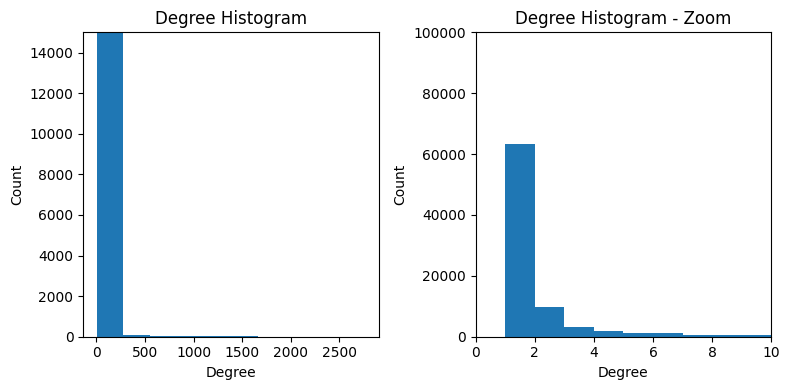

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,100000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g3.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub3 = nx.subgraph(g3, core)

print("{} nodes, {} edges".format(len(gsub3), nx.number_of_edges(gsub3)))

nx.write_graphml(gsub3, "cn3.graphml")

20254 nodes, 96550 edges


# Rede 4

## 4.1 Get the Data, Build the Network

In [ ]:
#https://en.wikipedia.org/wiki/FIFA_World_Cup_hosts
SEED4 = "FIFA World Cup hosts".title()

In [ ]:
todo_lst = [(0, SEED4)] # The SEED is in the layer 0
todo_set = set(SEED4) # The SEED itself
done_set = set() # Nothing is done yet

In [ ]:
g4 = nx.DiGraph()
layer, page = todo_lst[0]

In [ ]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst,
  # and add it to the set of processed pages.
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)

  # Show progress
  print(layer, page)

  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue

  for link in wiki.links:
    link = link.title()
    if link not in STOPS is not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g4.add_edge(page, link)
  layer, page = todo_lst[0]

0 Fifa World Cup Hosts
1 1930 Fifa World Cup
Could not load 1930 Fifa World Cup
1 1930 Fifa World Cup Final
1 1930 Fifa World Cup Bids
1 1930 Fifa World Cup Squads
Could not load 1930 Fifa World Cup Squads
1 1934 Fifa World Cup
Could not load 1934 Fifa World Cup
1 1934 Fifa World Cup Bids
Could not load 1934 Fifa World Cup Bids
1 1934 Fifa World Cup Final
Could not load 1934 Fifa World Cup Final
1 1934 Fifa World Cup Qualification
Could not load 1934 Fifa World Cup Qualification
1 1934 Fifa World Cup Squads
Could not load 1934 Fifa World Cup Squads
1 1938 Fifa World Cup
Could not load 1938 Fifa World Cup
1 1938 Fifa World Cup Bids
Could not load 1938 Fifa World Cup Bids
1 1938 Fifa World Cup Final
Could not load 1938 Fifa World Cup Final
1 1938 Fifa World Cup Qualification
Could not load 1938 Fifa World Cup Qualification
1 1938 Fifa World Cup Squads
Could not load 1938 Fifa World Cup Squads
1 1942 Fifa World Cup Bids
Could not load 1942 Fifa World Cup Bids
1 1950 Fifa World Cup
Could n

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Fifa
1 Fifa Congress
1 Fifa Council
1 Fifa Fan Festival
1 Fifa Women'S World Cup
1 Fifa World Cup
1 Fifa World Cup Trophy
1 Fifa World Cup Awards
1 Fifa World Cup Qualification
1 Fifa World Cup Records And Statistics
1 Fifa World Cup Referees
1 Fifa World Cup Top Goalscorers
1 Fifa World Cup Video Games
1 Federal Bureau Of Investigation
1 Football Association
1 Football Association Of Indonesia
1 Football Association Of Malaysia
1 Football Association Of Singapore
1 Forbes
1 Fourth Brazilian Republic
1 France
1 France 1938 Fifa World Cup Bid
Could not load France 1938 Fifa World Cup Bid
1 France 1990 Fifa World Cup Bid
Could not load France 1990 Fifa World Cup Bid
1 France 1998 Fifa World Cup Bid
1 France National Football Team
1 French Third Republic
1 Germany
1 Germany 1938 Fifa World Cup Bid
Could not load Germany 1938 Fifa World Cup Bid
1 Germany 1942 Fifa World Cup Bid
Could not load Germany 1942 Fifa World Cup Bid
1 Germany 2006 Fifa World Cup Bid
1 Germany Nationa

In [ ]:
print("{} nodes, {} edges".format(len(g4), nx.number_of_edges(g4)))

85686 nodes, 204715 edges


## 4.2 Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original4 = g4.copy()

In [ ]:
# remove self loops
g4.remove_edges_from(nx.selfloop_edges(g4))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in g4 if node + "s" in g4
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g4 = nx.contracted_nodes(g4, *dup, self_loops=False)

print(duplicates)

duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in g4]
                if x != y and y in g4]
print(duplicates)

for dup in duplicates:
  g4 = nx.contracted_nodes(g4, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g4, 0,"contraction")
nx.set_edge_attributes(g4, 0,"contraction")

[('Pampa', 'Pampas'), ('Quechua Language', 'Quechua Languages'), ('Syrian', 'Syrians'), ('Waterway', 'Waterways'), ('America', 'Americas'), ('Exit Poll', 'Exit Polls'), ('Austronesian People', 'Austronesian Peoples'), ('Bric', 'Brics'), ('Great Power', 'Great Powers'), ('Malaysian Malay', 'Malaysian Malays'), ('Muslim', 'Muslims'), ('Sport', 'Sports'), ('Superpower', 'Superpowers'), ('Anglo-Celtic Australian', 'Anglo-Celtic Australians'), ('Animist', 'Animists'), ('Chinese Australian', 'Chinese Australians'), ('English Australian', 'English Australians'), ('European Australian', 'European Australians'), ('Free Trade Agreement', 'Free Trade Agreements'), ('German Australian', 'German Australians'), ('Hunter-Gatherer', 'Hunter-Gatherers'), ('Irish Australian', 'Irish Australians'), ('Monsoon', 'Monsoons'), ('Scottish Australian', 'Scottish Australians'), ('World Heritage Site', 'World Heritage Sites'), ('Nightclub', 'Nightclubs'), ('Pharmaceutical', 'Pharmaceuticals'), ('Babelsberg Studi

In [ ]:
print("{} nodes, {} edges".format(len(g4), nx.number_of_edges(g4)))

85399 nodes, 204470 edges


## 4.3 Truncate the network

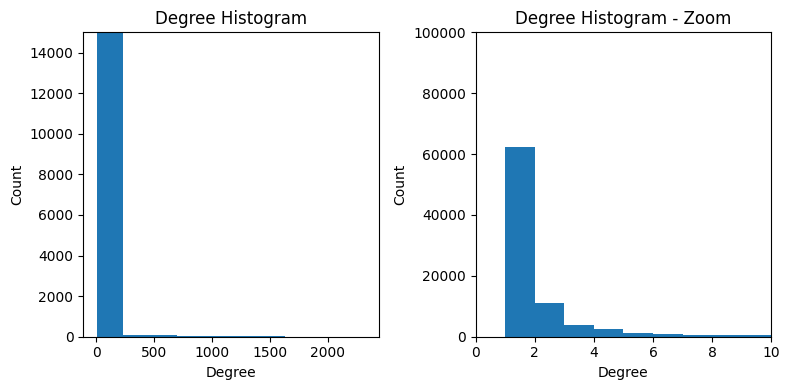

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g4.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,100000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g4.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub4 = nx.subgraph(g4, core)

print("{} nodes, {} edges".format(len(gsub4), nx.number_of_edges(gsub4)))

nx.write_graphml(gsub4, "cn4.graphml")

23066 nodes, 142137 edges


# União das redes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Joining graphs with compose

g1 = nx.read_graphml('/content/cn1.graphml')
g2 = nx.read_graphml('/content/cn2.graphml')
g3 = nx.read_graphml('/content/cn3.graphml')
g4 = nx.read_graphml('/content/cn4.graphml')

g1g2 = nx.compose(g1, g2)
g3g4 = nx.compose(g3, g4)
graph = nx.compose(g1g2, g3g4)

print("{} nodes, {} edges".format(len(graph), nx.number_of_edges(graph)))

52388 nodes, 443615 edges


## Truncate the network

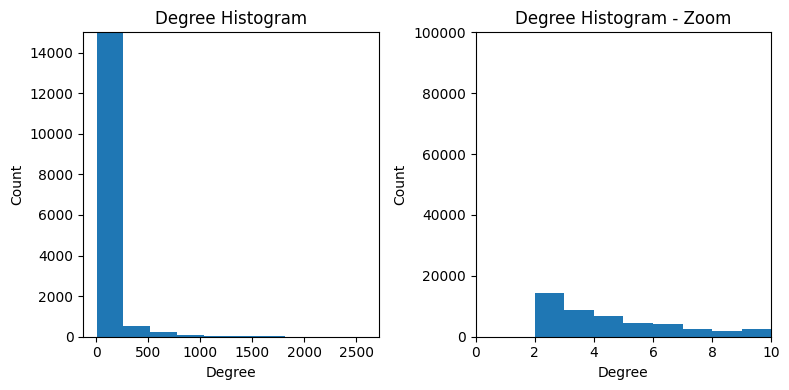

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,100000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(graph.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(graph, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cn4.graphml")

52388 nodes, 443615 edges


In [ ]:
nx.write_graphml(graph, "graph.graphml")